**Nearest Neighbors in Python with Annoy**

The nearest neighbor problem is common in data science for recommendations and embeddings. Annoy is a Python tool for approximating these calculations, and you can find it on GitHub.

First, you need to install the annoy library using:

In [1]:
pip install annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552446 sha256=82098fc309b20236d0fff08879b50be8d413d520cf46f3fe70c3645c227f1474
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


code for generating random data

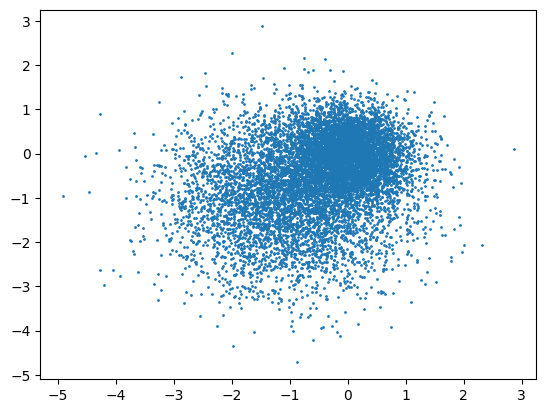

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from annoy import AnnoyIndex

# Create data points in two clusters
data_points = np.concatenate([
    np.random.normal(-1, 1, (5000, 2)),  # Cluster 1
    np.random.normal(0, 0.5, (5000, 2))  # Cluster 2
])

# Plot the data points
plt.scatter(data_points[:, 0], data_points[:, 1], s=1)
plt.show()


create an Annoy index to store the data points:

In [3]:
# Create an Annoy index for 2D points using Euclidean distance
index = AnnoyIndex(2, 'euclidean')

# Add all data points to the index
for i in range(data_points.shape[0]):
    index.add_item(i, data_points[i])

# Build the index with 1 tree
index.build(1)


True

Retrieve the nearest neighbors:

In [5]:
# Get the 20 nearest neighbors of the point [0., 0.]
neighbors = index.get_nns_by_vector([0., 0.], 20)


The code below will generate the same plot;

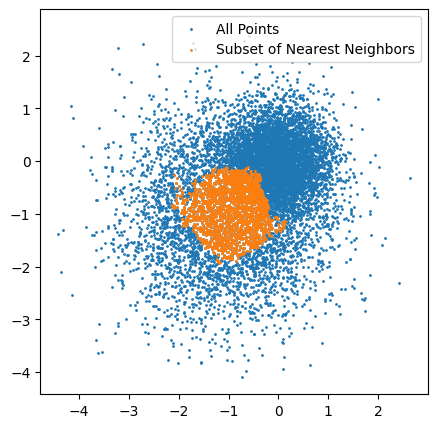

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from annoy import AnnoyIndex

def generate_data(num_samples, dimensions, clusters):
    # Generate random data for two clusters
    data_cluster1 = np.random.normal(-1, 1, (num_samples // 2, dimensions))
    data_cluster2 = np.random.normal(0, 0.5, (num_samples // 2, dimensions))
    return np.concatenate([data_cluster1, data_cluster2])

def create_annoy_index(data, dimensions):
    # Create an Annoy index using Euclidean distance
    index = AnnoyIndex(dimensions, 'euclidean')
    for i, vector in enumerate(data):
        index.add_item(i, vector)
    index.build(n_trees=1)
    return index

def plot_data(all_data, subset_data):
    # Plot all data points
    plt.figure(figsize=(5, 5))
    plt.scatter(all_data[:, 0], all_data[:, 1], s=1, label='All Points')
    # Highlight the subset of data
    plt.scatter(subset_data[:, 0], subset_data[:, 1], s=1, label='Subset of Nearest Neighbors')
    plt.legend()
    plt.show()

# Parameters
num_samples = 10000
dimensions = 2
target_vector = [-1, -1]
num_neighbors = 2000

# Generate data
data_points = generate_data(num_samples, dimensions, clusters=2)

# Create and build Annoy index
annoy_index = create_annoy_index(data_points, dimensions)

# Retrieve indices of nearest neighbors
neighbor_indices = annoy_index.get_nns_by_vector(target_vector, num_neighbors)

# Subset of nearest neighbors
neighbors_subset = data_points[neighbor_indices]

# Plot data and subset
plot_data(data_points, neighbors_subset)


The code below should be more accurate than before.

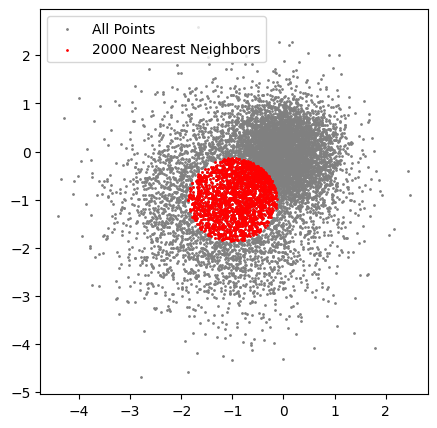

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from annoy import AnnoyIndex

# Set the number of columns for the data points
columns = 2

# Generate random data
vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),  # Cluster around (-1, 1)
    np.random.normal(0, 0.5, (5000, columns)),  # Cluster around (0, 0.5)
])

# Initialize and build Annoy index
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i])
annoy.build(n_trees=10)  # Increase the number of trees to 10 for better accuracy

# Plot all data points
plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1, color='gray', label='All Points')

# Find and plot the 2000 nearest neighbors to the point [-1, -1]
indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000, include_distances=False)
subset = vecs[indices]
plt.scatter(subset[:, 0], subset[:, 1], s=1, color='red', label='2000 Nearest Neighbors')

# Display the plot with a legend
plt.legend()
plt.show()


Benchmark Annoy Performance against Scikit-Learn

In [9]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import matplotlib.pyplot as plt

# Generate random data
vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, 2)),
    np.random.normal(0, 0.5, (5000, 2)),
])

# Query setup
query = np.array([-2., -2.])
q = query.reshape(1, -2)  # Scikit-Learn requires the query to be two-dimensional
n_neighbors = 10

# Benchmark with Scikit-Learn's Ball Tree
nn_ball = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(vecs)
%timeit -n 10 distances, indices = nn_ball.kneighbors(q)

# Benchmark with Scikit-Learn's KD-Tree
nn_kd = NearestNeighbors(n_neighbors=n_neighbors, algorithm='kd_tree').fit(vecs)
%timeit -n 10 distances, indices = nn_kd.kneighbors(q)

# Benchmark with Scikit-Learn's brute force method
nn_brute = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute').fit(vecs)
%timeit -n 10 distances, indices = nn_brute.kneighbors(q)

# Function to setup and time Annoy index
def benchmark_annoy(n_trees):
    annoy_index = AnnoyIndex(2, 'euclidean')
    for i in range(vecs.shape[0]):
        annoy_index.add_item(i, vecs[i])
    annoy_index.build(n_trees)
    %timeit -n 10 annoy_index.get_nns_by_vector(query, n_neighbors)

# Benchmark Annoy with 10 trees
benchmark_annoy(10)

# Benchmark Annoy with 1 tree
benchmark_annoy(1)


The slowest run took 14.36 times longer than the fastest. This could mean that an intermediate result is being cached.
2 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.17 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 10.07 times longer than the fastest. This could mean that an intermediate result is being cached.
12.1 ms ± 8.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.9 µs ± 3.94 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.76 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Extra Features of Annoy


In [10]:
import numpy as np
from annoy import AnnoyIndex

def generate_data():
    """Generate random vectors for two clusters."""
    columns = 2
    cluster_one = np.random.normal(-1, 1, (5000, columns))
    cluster_two = np.random.normal(0, 0.5, (5000, columns))
    return np.concatenate([cluster_one, cluster_two])

def create_and_save_annoy_index(data, filename, n_trees=1, metric='euclidean'):
    """Create an Annoy index, add items, build it, and save to disk."""
    index = AnnoyIndex(data.shape[1], metric)
    for i, vector in enumerate(data):
        index.add_item(i, vector)
    index.build(n_trees)
    index.save(filename)
    print(f"Index saved to {filename}")

def load_annoy_index(filename, columns, metric='euclidean'):
    """Load an Annoy index from disk."""
    index = AnnoyIndex(columns, metric)
    index.load(filename)
    print(f"Index loaded from {filename}")
    return index

# Main execution block
vecs = generate_data()
index_filename = 'test.ann'

# Create and save the index
create_and_save_annoy_index(vecs, index_filename)

# Load the index from disk
loaded_index = load_annoy_index(index_filename, vecs.shape[1])


Index saved to test.ann
Index loaded from test.ann
